# Total Household Income (Weekly), 2011 and 2016

### Step 1: Import libraries, Import data, Get a clean dataframe

In [1]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
import numpy as np
from datetime import datetime
from datetime import date
import statsmodels.api as sm
import geopandas as gpd
from geopandas import GeoDataFrame
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#read in B28 Table (2011): Total Household Income (Weekly) by Household Composition
inc_b28 = pd.read_csv('C:\\Users\\ryanm\\Box\\Shared 228 Sydney Folder\\AU Work\\2011_census_files\\SA2_NSW\\2011Census_B28_NSW_SA2_short.csv')

#read in G29 Table (2016): Total Household Income (Weekly) by Household Composition
inc_g29 = pd.read_csv('C:\\Users\\ryanm\\Box\\Shared 228 Sydney Folder\\AU Work\\2016_census_files\\SA2_NSW\\2016Census_G29_NSW_SA2.csv')

#read in the correspondence file 2011<->2016
corr = pd.read_csv('C:\\Users\\ryanm\\Box\\Shared 228 Sydney Folder\\AU Work\\2011_2016_correspondence\\2011_2016_corr.csv')

### Cleaning 2016 Table G29

In [3]:
#find the total column for each household income range (not broken down fam/nonfam)
## tot_cols = [col for col in inc_g29.columns if 'Tot' in col]
## print(list(inc_g29.columns))
## print(tot_cols)

In [4]:
#keep only the total column for each household income range (not broken down fam/nonfam)

inc_g29 = inc_g29[['SA2_MAINCODE_2016', 'Negative_Nil_income_Tot', 'HI_1_149_Tot', 'HI_150_299_Tot', 
                   'HI_300_399_Tot', 'HI_400_499_Tot', 'HI_500_649_Tot', 'HI_650_799_Tot', 
                   'HI_800_999_Tot', 'HI_1000_1249_Tot', 'HI_1250_1499_Tot', 'HI_1500_1749_Tot', 
                   'HI_1750_1999_Tot', 'HI_2000_2499_Tot', 'HI_2500_2999_Tot', 'HI_3000_3499_Tot', 
                   'HI_3500_3999_Tot', 'HI_4000_more_Tot', 'Partial_income_stated_Tot', 
                   'All_incomes_not_stated_Tot', 'Tot_Tot']]

inc_g29.head()

,SA2_MAINCODE_2016,Negative_Nil_income_Tot,HI_1_149_Tot,HI_150_299_Tot,HI_300_399_Tot,HI_400_499_Tot,HI_500_649_Tot,HI_650_799_Tot,HI_800_999_Tot,HI_1000_1249_Tot,HI_1250_1499_Tot,HI_1500_1749_Tot,HI_1750_1999_Tot,HI_2000_2499_Tot,HI_2500_2999_Tot,HI_3000_3499_Tot,HI_3500_3999_Tot,HI_4000_more_Tot,Partial_income_stated_Tot,All_incomes_not_stated_Tot,Tot_Tot
0,101021007,17,20,33,59,154,83,131,104,119,96,69,74,122,64,45,34,62,129,42,1453
1,101021008,22,13,55,88,176,97,186,179,207,190,169,189,341,238,187,131,217,202,69,2963
2,101021009,42,32,91,146,303,205,328,329,429,407,366,302,519,281,185,146,182,233,108,4621
3,101021010,22,7,30,69,105,89,126,142,212,181,134,120,241,111,92,76,126,126,30,2030
4,101021011,40,17,48,43,138,92,133,181,273,248,274,264,627,483,457,435,928,491,78,5243


In [5]:
#rename columns with yr to facilitate merge
inc_g29.rename(columns={'Negative_Nil_income_Tot':'h16_neg_nil',
                        'HI_1_149_Tot':'h16_1_149', 
                        'HI_150_299_Tot':'h16_150_299',
                        'HI_300_399_Tot':'h16_300_399', 
                        'HI_400_499_Tot':'h16_400_499', 
                        'HI_500_649_Tot':'h16_500_649', 
                        'HI_650_799_Tot':'h16_650_799',
                        'HI_800_999_Tot':'h16_800_999', 
                        'HI_1000_1249_Tot':'h16_1000_1249', 
                        'HI_1250_1499_Tot':'h16_1250_1499', 
                        'HI_1500_1749_Tot':'h16_1500_1749', 
                        'HI_1750_1999_Tot':'h16_1750_1999', 
                        'HI_2000_2499_Tot':'h16_2000_2499', 
                        'HI_2500_2999_Tot':'h16_2500_2999', 
                        'HI_3000_3499_Tot':'h16_3000_3499', 
                        'HI_3500_3999_Tot':'h16_3500_3999', 
                        'HI_4000_more_Tot':'h16_4000_more', 
                        'Partial_income_stated_Tot':'h16_partial_rptd', 
                        'All_incomes_not_stated_Tot':'h16_allnot_rptd',
                        'Tot_Tot':'h16_count_total'}, inplace=True)

### Cleaning 2011 Table B28

In [6]:
#find the total column for each household income range (not broken down fam/nonfam)
## tot_cols = [col for col in inc_b28.columns if 'Tot' in col]
## print(list(inc_b28.columns))
## print(tot_cols)

In [7]:
#keep only the total column for each household income range (not broken down fam/nonfam)

inc_b28 = inc_b28[['region_id', 'Negative_Nil_income_Tot', 'HI_1_199_Tot', 'HI_200_299_Tot', 'HI_300_399_Tot', 
                   'HI_400_599_Tot', 'HI_600_799_Tot', 'HI_800_999_Tot', 'HI_1000_1249_Tot', 'HI_1250_1499_Tot', 
                   'HI_1500_1999_Tot', 'HI_2000_2499_Tot', 'HI_2500_2999_Tot', 'HI_3000_3499_Tot', 
                   'HI_3500_3999_Tot', 'HI_4000_more_Tot', 'Partial_income_stated_Tot', 'All_incomes_not_stated_Tot', 
                   'Tot_Tot']]

In [8]:
#rename "region_id" to "SA2_MAINCODE_2011" for SA2 ID to match 2016 and corr format
inc_b28.rename(columns={'region_id':'SA2_MAINCODE_2011'}, inplace=True)

In [9]:
#rename columns with yr to facilitate merge
inc_b28.rename(columns={'Negative_Nil_income_Tot':'h11_neg_nil',
                        'HI_1_199_Tot':'h11_1_199', 
                        'HI_200_299_Tot':'h11_200_299',
                        'HI_300_399_Tot':'h11_300_399', 
                        'HI_400_599_Tot':'h11_400_599', 
                        'HI_600_799_Tot':'h11_600_799',
                        'HI_800_999_Tot':'h11_800_999', 
                        'HI_1000_1249_Tot':'h11_1000_1249', 
                        'HI_1250_1499_Tot':'h11_1250_1499', 
                        'HI_1500_1999_Tot':'h11_1500_1999',
                        'HI_2000_2499_Tot':'h11_2000_2499', 
                        'HI_2500_2999_Tot':'h11_2500_2999', 
                        'HI_3000_3499_Tot':'h11_3000_3499', 
                        'HI_3500_3999_Tot':'h11_3500_3999', 
                        'HI_4000_more_Tot':'h11_4000_more', 
                        'Partial_income_stated_Tot':'h11_partial_rptd', 
                        'All_incomes_not_stated_Tot':'h11_allnot_rptd',
                        'Tot_Tot':'h11_count_total'}, inplace=True)

### Correspondence: Fitting 2011 Data to 2016 Geographies

In [10]:
#merge many:many, joining income B28 table (NSW) to the correspondence table (all of Australia)

inc_2011 = pd.merge(inc_b28,corr,on='SA2_MAINCODE_2011',how='right')

In [11]:
#apply correspondence ration to 2011 data to fit to 2016 SA2 areas

inc_2011['h11_neg_nil_sa2'] = inc_2011['h11_neg_nil'] * inc_2011['RATIO']
inc_2011['h11_1_199_sa2'] = inc_2011['h11_1_199'] * inc_2011['RATIO']
inc_2011['h11_200_299_sa2'] = inc_2011['h11_200_299'] * inc_2011['RATIO']
inc_2011['h11_300_399_sa2'] = inc_2011['h11_300_399'] * inc_2011['RATIO']
inc_2011['h11_400_599_sa2'] = inc_2011['h11_400_599'] * inc_2011['RATIO']
inc_2011['h11_600_799_sa2'] = inc_2011['h11_600_799'] * inc_2011['RATIO']
inc_2011['h11_800_999_sa2'] = inc_2011['h11_800_999'] * inc_2011['RATIO']
inc_2011['h11_1000_1249_sa2'] = inc_2011['h11_1000_1249'] * inc_2011['RATIO']
inc_2011['h11_1250_1499_sa2'] = inc_2011['h11_1250_1499'] * inc_2011['RATIO']
inc_2011['h11_1500_1999_sa2'] = inc_2011['h11_1500_1999'] * inc_2011['RATIO']
inc_2011['h11_2000_2499_sa2'] = inc_2011['h11_2000_2499'] * inc_2011['RATIO']
inc_2011['h11_2500_2999_sa2'] = inc_2011['h11_2500_2999'] * inc_2011['RATIO']
inc_2011['h11_3000_3499_sa2'] = inc_2011['h11_3000_3499'] * inc_2011['RATIO']
inc_2011['h11_3500_3999_sa2'] = inc_2011['h11_3500_3999'] * inc_2011['RATIO']
inc_2011['h11_4000_more_sa2'] = inc_2011['h11_4000_more'] * inc_2011['RATIO']
inc_2011['h11_partial_rptd_sa2'] = inc_2011['h11_partial_rptd'] * inc_2011['RATIO']
inc_2011['h11_allnot_rptd_sa2'] = inc_2011['h11_allnot_rptd'] * inc_2011['RATIO']
inc_2011['h11_count_total_sa2'] = inc_2011['h11_count_total'] * inc_2011['RATIO']

In [12]:
## print(list(inc_2011.columns))

In [13]:
#restrict df to refitted 2016 SA2 areas

inc_2011 = inc_2011[['SA2_MAINCODE_2016', 'SA2_NAME_2016', 'RATIO', 'PERCENTAGE', 
                     'h11_neg_nil_sa2', 'h11_1_199_sa2', 'h11_200_299_sa2', 'h11_300_399_sa2', 
                     'h11_400_599_sa2', 'h11_600_799_sa2', 'h11_800_999_sa2', 'h11_1000_1249_sa2', 
                     'h11_1250_1499_sa2', 'h11_1500_1999_sa2', 'h11_2000_2499_sa2', 'h11_2500_2999_sa2', 
                     'h11_3000_3499_sa2', 'h11_3500_3999_sa2', 'h11_4000_more_sa2', 'h11_partial_rptd_sa2', 
                     'h11_allnot_rptd_sa2', 'h11_count_total_sa2']]

In [14]:
#pull csv and pivot in Excel
inc_2011.to_csv('C:\\Users\\ryanm\\Box\\Shared 228 Sydney Folder\\AU Work\\Indv Work Folder\\Ryan Work Folder\\inc_2011.csv',index=False)

In [15]:
#read back in pivoted data
inc_2011_sa2 = pd.read_csv('C:\\Users\\ryanm\\Box\\Shared 228 Sydney Folder\\AU Work\\Indv Work Folder\\Ryan Work Folder\\inc_2011_sa2.csv')

### Merging 2011 Income Data, 2016 Income Data, and 2016 SA2 Geographies for Greater Sydney

In [16]:
#merge Tables B28 and G29 bounding for Greater Sydney
income = pd.merge(inc_2011_sa2, inc_g29, on='SA2_MAINCODE_2016', how='right')

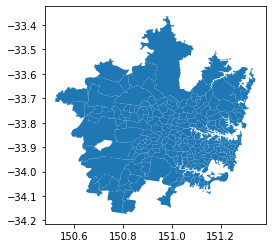

In [17]:
syd_ucl = gpd.read_file('C:\\Users\\ryanm\\Box\\Shared 228 Sydney Folder\\SA2 Shapefiles\\sa2_ucl.dbf')
syd_ucl['SA2_MAIN16']=syd_ucl['SA2_MAIN16'].astype(int)
syd_ucl.plot()

In [18]:
#merge 2011 and 2016 income data with UCL SA2 data
inc_11_16 = pd.merge(syd_ucl, income, left_on='SA2_MAIN16', right_on='SA2_MAINCODE_2016', how='left').copy()
inc_11_16.head()

,SA2_MAIN16,SA2_5DIG16,SA2_NAME16,SA3_CODE16,SA3_NAME16,SA4_CODE16,SA4_NAME16,GCC_CODE16,GCC_NAME16,STE_CODE16,STE_NAME16,AREASQKM16,geometry,SA2_MAINCODE_2016,h11_neg_nil_sa2,h11_1_199_sa2,h11_200_299_sa2,h11_300_399_sa2,h11_400_599_sa2,h11_600_799_sa2,h11_800_999_sa2,h11_1000_1249_sa2,h11_1250_1499_sa2,h11_1500_1999_sa2,h11_2000_2499_sa2,h11_2500_2999_sa2,h11_3000_3499_sa2,h11_3500_3999_sa2,h11_4000_more_sa2,h11_count_total_sa2,h16_neg_nil,h16_1_149,h16_150_299,h16_300_399,h16_400_499,h16_500_649,h16_650_799,h16_800_999,h16_1000_1249,h16_1250_1499,h16_1500_1749,h16_1750_1999,h16_2000_2499,h16_2500_2999,h16_3000_3499,h16_3500_3999,h16_4000_more,h16_partial_rptd,h16_allnot_rptd,h16_count_total
0,115011290,11290,Baulkham Hills (East),11501,Baulkham Hills,115,Sydney - Baulkham Hills and Hawkesbury,1GSYD,Greater Sydney,1,New South Wales,8.3081,"POLYGON ((150.97069 -33.75928, 150.97071 -33.7...",115011290,53.000000,75.000000,91.000000,254.000000,478.000000,444.000000,496.000000,448.000000,480.000000,953.000000,754.000000,959.000000,596.000000,279.000000,381.000000,7356.000000,91,45,72,100,293,232,373,374,514,486,423,438,959,711,567,462,851,548,106,7657
1,115011291,11291,Baulkham Hills (West) - Bella Vista,11501,Baulkham Hills,115,Sydney - Baulkham Hills and Hawkesbury,1GSYD,Greater Sydney,1,New South Wales,10.9631,"POLYGON ((150.94715 -33.74089, 150.94704 -33.7...",115011291,52.000000,51.000000,44.000000,102.000000,216.000000,232.000000,296.000000,284.000000,283.000000,612.000000,520.000000,725.000000,580.000000,293.000000,636.000000,5574.000000,75,26,56,43,121,128,199,232,331,307,263,301,658,502,446,406,1247,574,67,5971
2,115011294,11294,Glenhaven,11501,Baulkham Hills,115,Sydney - Baulkham Hills and Hawkesbury,1GSYD,Greater Sydney,1,New South Wales,7.2309,"POLYGON ((150.98461 -33.70294, 150.98468 -33.7...",115011294,22.999995,20.999996,15.999997,23.999995,83.999983,81.999984,115.999977,100.999980,95.999981,158.999968,154.999969,245.999951,170.999966,120.999976,196.999961,1842.999631,14,13,16,26,82,51,89,100,145,106,80,113,183,144,112,128,431,186,39,2049
3,115011296,11296,West Pennant Hills,11501,Baulkham Hills,115,Sydney - Baulkham Hills and Hawkesbury,1GSYD,Greater Sydney,1,New South Wales,7.8291,"POLYGON ((151.02214 -33.73881, 151.02214 -33.7...",115011296,46.000000,37.000000,33.000000,72.000000,113.000000,145.000000,143.000000,162.000000,194.000000,348.000000,289.000000,542.000000,399.000000,255.000000,577.000000,3802.000000,34,20,33,34,82,66,107,119,172,193,154,132,376,288,278,292,1029,380,39,3825
4,115011553,11553,Castle Hill - Central,11501,Baulkham Hills,115,Sydney - Baulkham Hills and Hawkesbury,1GSYD,Greater Sydney,1,New South Wales,4.1512,"POLYGON ((150.97343 -33.73437, 150.97332 -33.7...",115011553,30.208545,24.166836,31.259277,64.882701,118.207350,116.368569,132.654915,147.890529,154.982970,270.038124,214.086645,311.542038,214.349328,114.267105,218.552256,2405.125548,34,8,26,32,87,82,125,121,166,153,151,147,357,220,165,168,333,190,30,2586


### Identify Regional Income Quintiles, Quartiles, Medians for 2011 and 2016

In [19]:
#print(list(inc_11_16.columns))

In [20]:
#pull to Excel to find quintile and quartile break points
inc_ucl = inc_11_16[['h11_neg_nil_sa2', 'h11_1_199_sa2', 'h11_200_299_sa2', 'h11_300_399_sa2', 'h11_400_599_sa2', 'h11_600_799_sa2', 'h11_800_999_sa2', 'h11_1000_1249_sa2', 'h11_1250_1499_sa2', 'h11_1500_1999_sa2', 'h11_2000_2499_sa2', 'h11_2500_2999_sa2', 'h11_3000_3499_sa2', 'h11_3500_3999_sa2', 'h11_4000_more_sa2','h16_neg_nil', 'h16_1_149', 'h16_150_299', 'h16_300_399', 'h16_400_499', 'h16_500_649', 'h16_650_799', 'h16_800_999', 'h16_1000_1249', 'h16_1250_1499', 'h16_1500_1749', 'h16_1750_1999', 'h16_2000_2499', 'h16_2500_2999', 'h16_3000_3499', 'h16_3500_3999', 'h16_4000_more']]
inc_ucl.to_csv('C:\\Users\\ryanm\\Box\\Shared 228 Sydney Folder\\AU Work\\Indv Work Folder\\Ryan Work Folder\\inc_ucl.csv',index=False)

#### 2011 Weekly Household Income Break Points
* **Bottom Quintile** (0.0-19.5%): Neg-Nil, 1-199, 200-299, 300-399, 400-599
* **Bottom 2 Quintiles** (0.0-42.6%): Neg-Nil, 1-199, 200-299, 300-399, 400-599, 600-799, 800-999, 1000-1249
* **Below Median** (0.0-50.2%): Neg-Nil, 1-199, 200-299, 300-399, 400-599, 600-799, 800-999, 1000-1249, 1250-1499

In [21]:
#sum income in bottom 2 quintiles
inc_11_16['btm40_11_1249'] = inc_11_16['h11_neg_nil_sa2'] + inc_11_16['h11_1_199_sa2'] + inc_11_16['h11_200_299_sa2'] + inc_11_16['h11_300_399_sa2'] + inc_11_16['h11_400_599_sa2'] + inc_11_16['h11_600_799_sa2'] + inc_11_16['h11_800_999_sa2'] + inc_11_16['h11_1000_1249_sa2']

#calculate a total count of households reporting full weekly income in SA2
inc_11_16['total_11'] = inc_11_16['h11_neg_nil_sa2'] + inc_11_16['h11_1_199_sa2'] + inc_11_16['h11_200_299_sa2'] + inc_11_16['h11_300_399_sa2'] + inc_11_16['h11_400_599_sa2'] + inc_11_16['h11_600_799_sa2'] + inc_11_16['h11_800_999_sa2'] + inc_11_16['h11_1000_1249_sa2'] + inc_11_16['h11_1250_1499_sa2'] + inc_11_16['h11_1500_1999_sa2'] + inc_11_16['h11_2000_2499_sa2'] + inc_11_16['h11_2500_2999_sa2'] + inc_11_16['h11_3000_3499_sa2'] + inc_11_16['h11_3500_3999_sa2'] + inc_11_16['h11_4000_more_sa2']   

In [22]:
#calculate % households in SA2 with income in bottom 40th percentile for region
inc_11_16['btm40_11_pct'] = (inc_11_16['btm40_11_1249'])/(inc_11_16['total_11'])

In [23]:
#determine what % of households in median SA2 has income in regional bottom 42.6% bracket for 2011 ($0-1249)

inc_11_16['btm40_11_pct'].describe()

count    260.000000
mean       0.427506
std        0.132868
min        0.000000
25%        0.333931
50%        0.414365
75%        0.493389
max        1.000000
Name: btm40_11_pct, dtype: float64

In [24]:
#dummy variable for SA2s where % hhs in regional bottom income bracket > regional median (41.4365%) 2011

inc_11_16['btm40_11_pct_ovregmed'] = np.where(inc_11_16["btm40_11_pct"] > 0.414365, 1, 0)

#### 2016 Weekly Household Income Breaks

* **Bottom Quintile (2011 + inflation)** (0-16.2%): Neg-Nil, 1-149, 150-299, 300-399, 400-499, 500-649
* **Bottom Quintile (2016)** (0.0-22.0%): Neg-Nil, 1-149, 150-299, 300-399, 400-499, 500-649, 650-799

* **Bottom 2 Quintiles (2011+inflation; also 2016)** (0.0-42.4%): Neg-Nil, 1-149, 150-299, 300-399, 400-499, 500-649, 650-799, 800-999, 1000-1249, 1250-1499

* **Below Median** (0.0-48.7%): Neg-Nil, 1-149, 150-299, 300-399, 400-499, 500-649, 650-799, 800-999, 1000-1249, 1250-1499, 1500-1749

In [25]:
#sum income in bottom 2 quintiles
inc_11_16['btm40_16_1499'] = inc_11_16['h16_neg_nil'] + inc_11_16['h16_1_149'] + inc_11_16['h16_150_299'] + inc_11_16['h16_300_399'] + inc_11_16['h16_400_499'] + inc_11_16['h16_500_649'] + inc_11_16['h16_650_799'] + inc_11_16['h16_800_999'] + inc_11_16['h16_1000_1249'] + inc_11_16['h16_1250_1499']

#calculate a total count of households reporting full weekly income in each SA2
inc_11_16['total_16'] = inc_11_16['h16_neg_nil'] + inc_11_16['h16_1_149'] + inc_11_16['h16_150_299'] + inc_11_16['h16_300_399'] + inc_11_16['h16_400_499'] + inc_11_16['h16_500_649'] + inc_11_16['h16_650_799'] + inc_11_16['h16_800_999'] + inc_11_16['h16_1000_1249'] + inc_11_16['h16_1250_1499'] + inc_11_16['h16_1500_1749'] + inc_11_16['h16_1750_1999'] + inc_11_16['h16_2000_2499'] + inc_11_16['h16_2500_2999'] + inc_11_16['h16_3000_3499'] + inc_11_16['h16_3500_3999'] + inc_11_16['h16_4000_more']  

In [26]:
#calculate % households in SA2 with income in bottom 40th percentile for region
inc_11_16['btm40_16_pct'] = (inc_11_16['btm40_16_1499'])/(inc_11_16['total_16'])

### Calculate Change in Percent of Households in SA2 with Low Incomes from 2011 to 2016

In [27]:
inc_11_16['netdiff_lowinc'] = inc_11_16['btm40_16_1499'] - inc_11_16['btm40_11_1249']

In [28]:
inc_11_16['netdiff_lowinc'].describe()

count     265.000000
mean      141.090955
std       248.983356
min      -562.779570
25%         0.000000
50%        84.000000
75%       241.000000
max      1864.000000
Name: netdiff_lowinc, dtype: float64

In [29]:
inc_11_16['netdiff_lowinc'].loc[inc_11_16['btm40_11_pct_ovregmed']==1].describe()

count     130.000000
mean      163.146263
std       274.753065
min      -562.779570
25%         6.160064
50%       118.137901
75%       267.064969
max      1864.000000
Name: netdiff_lowinc, dtype: float64

In [30]:
inc_11_16['netdiff_lowinc'].loc[inc_11_16['btm40_11_pct_ovregmed']==0].describe()

count     135.000000
mean      119.852510
std       220.309002
min      -365.692160
25%         0.000000
50%        68.000000
75%       200.500000
max      1178.000000
Name: netdiff_lowinc, dtype: float64

In [31]:
inc_11_16['loss_ovmed'] = np.where(((inc_11_16['btm40_11_pct_ovregmed']==1) & (inc_11_16['netdiff_lowinc'] < 118)), 1, 
                                  np.where(((inc_11_16['btm40_11_pct_ovregmed']==0) & (inc_11_16['netdiff_lowinc'] < 68)), 1, 
                                          np.where(((inc_11_16['btm40_11_pct_ovregmed']==1) & (inc_11_16['netdiff_lowinc'] >= 118)), 0, 
                                                  np.where(((inc_11_16['btm40_11_pct_ovregmed']==0) & (inc_11_16['netdiff_lowinc'] >= 68)), 0, np.nan))))

In [32]:
inc_11_16['losstypes'] = np.where((inc_11_16['btm40_11_pct_ovregmed']==0) & (inc_11_16['loss_ovmed']==1),-2,
                                 np.where((inc_11_16['btm40_11_pct_ovregmed']==0) & (inc_11_16['loss_ovmed']==0),-1,
                                         np.where((inc_11_16['btm40_11_pct_ovregmed']==1) & (inc_11_16['loss_ovmed']==0),1,
                                                np.where((inc_11_16['btm40_11_pct_ovregmed']==1) & (inc_11_16['loss_ovmed']==1),2,0))))

In [33]:
# inc_11_16['netloss_ovregmed'] = np.where(inc_11_16["netdiff_lowinc"] < 84, 1, 0)

In [34]:
# inc_11_16['losstypes'] = np.where((inc_11_16['btm40_11_pct_ovregmed']==0) & (inc_11_16['netloss_ovregmed']==1),-2,
                                 # np.where((inc_11_16['btm40_11_pct_ovregmed']==0) & (inc_11_16['netloss_ovregmed']==0),-1,
                                         # np.where((inc_11_16['btm40_11_pct_ovregmed']==1) & (inc_11_16['netloss_ovregmed']==0),1,
                                                # np.where((inc_11_16['btm40_11_pct_ovregmed']==1) & (inc_11_16['netloss_ovregmed']==1),2,0))))

### Map Low-Income Household Distribution in 2011, 2016, and Change 2011-2016

In [35]:
inc_map = inc_11_16

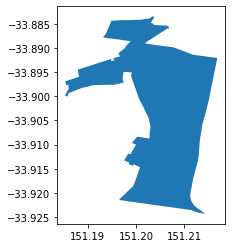

In [36]:
# let's isolate the sa2s that make up Redfern/Waterloo
red_wat_gdf = inc_map[(inc_map.SA2_MAIN16==117031335)
                          |(inc_map.SA2_MAIN16==117031338)]

# now let's create a simple rendition of the df so that we can combine its SA2 boundaries
red_wat_simple = red_wat_gdf[['SA2_MAIN16','geometry', "SA4_NAME16"]].reset_index()

# "dissolve" or "aggregates" all the polygons that share the same value for the variable we call
red_wat_sgdf=red_wat_simple.dissolve(by="SA4_NAME16")
red_wat_sgdf.plot()

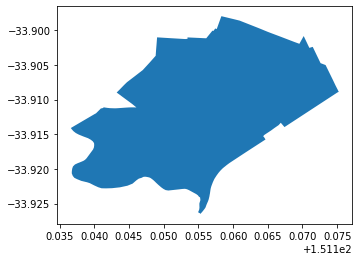

In [37]:
# let's isolate the sa2s that make up Marrickville
marr_gdf = inc_map[(inc_map.SA2_MAIN16==117021326)]

# now let's create a simple rendition of the df so that we can combine its SA2 boundaries
marr_simple = marr_gdf[['SA2_MAIN16','geometry', "SA4_NAME16"]].reset_index()

# "dissolve" or "aggregates" all the polygons that share the same value for the variable we call
marr_sgdf=marr_simple.dissolve(by="SA4_NAME16")
marr_sgdf.plot()

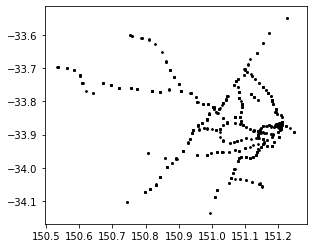

In [38]:
stations = gpd.read_file('C:\\Users\\ryanm\\Box\\Shared 228 Sydney Folder\\Transportation Shapefiles\\entrances_ucl_ryan.dbf')
stations.plot(markersize=3, color="black")

In [39]:
inc_map['btm40_11_pct'].replace(to_replace=np.nan, value=0, inplace=True)
inc_map['btm40_16_pct'].replace(to_replace=np.nan, value=0, inplace=True)

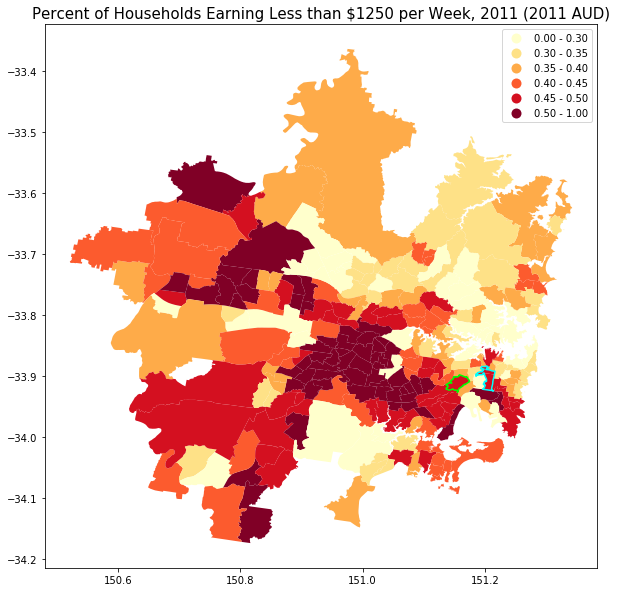

In [40]:
figure, ax = plt.subplots(figsize=(12,10))
base = inc_map.plot(column="btm40_11_pct", scheme='user_defined', classification_kwds={'bins':[0.3, 0.35, 0.4, 0.45, 0.5]}, legend=True, ax=ax, cmap="YlOrRd")
ax.set_title('Percent of Households Earning Less than $1250 per Week, 2011 (2011 AUD)', fontdict={'fontsize':15})

red_wat_sgdf.plot(ax=base, facecolor='none', edgecolor = "aqua", linewidth = 1.5)
marr_sgdf.plot(ax=base, facecolor='none', edgecolor = "lime", linewidth = 1.5)

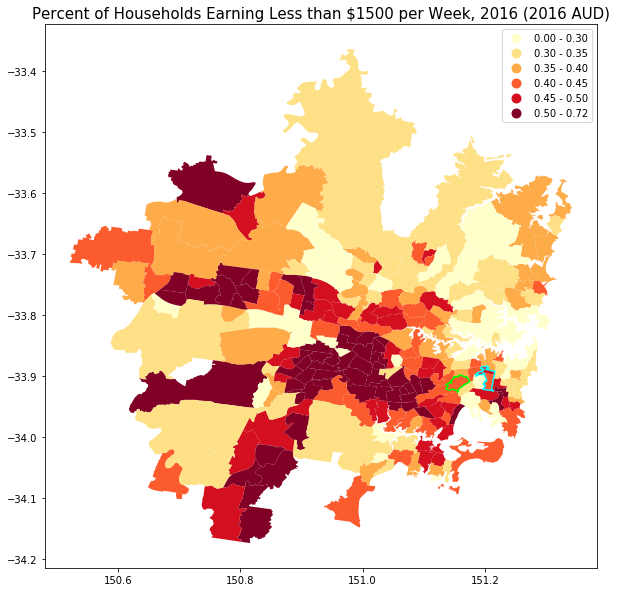

In [41]:
figure, ax = plt.subplots(figsize=(12,10))
base = inc_map.plot(column="btm40_16_pct", scheme='user_defined', classification_kwds={'bins':[0.3, 0.35, 0.4, 0.45, 0.5]}, legend=True, ax=ax, cmap="YlOrRd")
ax.set_title('Percent of Households Earning Less than $1500 per Week, 2016 (2016 AUD)', fontdict={'fontsize':15})

red_wat_sgdf.plot(ax=base, facecolor='none', edgecolor = "aqua", linewidth = 1.5)
marr_sgdf.plot(ax=base, facecolor='none', edgecolor = "lime", linewidth = 1.5)

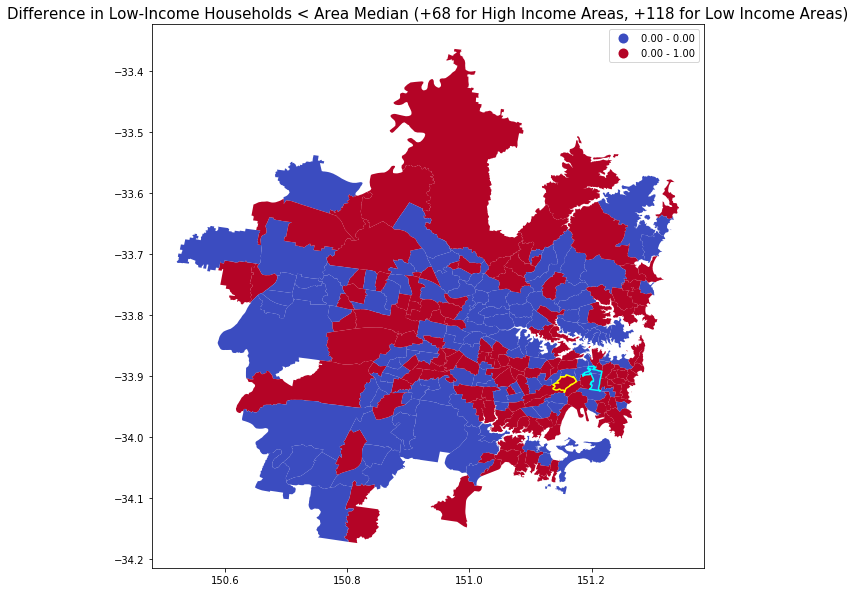

In [42]:
figure, ax = plt.subplots(figsize=(12,10))
base = inc_map.plot(column="loss_ovmed", scheme = "fisher_jenks", k = 2, legend=True, ax=ax, cmap="coolwarm")
ax.set_title('Difference in Low-Income Households < Area Median (+68 for High Income Areas, +118 for Low Income Areas)', fontdict={'fontsize':15})

red_wat_sgdf.plot(ax=base, facecolor='none', edgecolor = "aqua", linewidth = 1.5)
marr_sgdf.plot(ax=base, facecolor='none', edgecolor = "yellow", linewidth = 1.5)

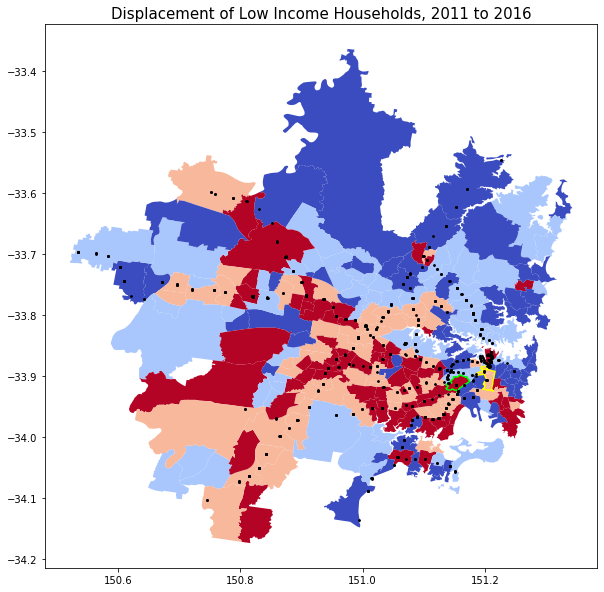

In [43]:
figure, ax = plt.subplots(figsize=(12,10))
base = inc_map.plot(column="losstypes", scheme = "fisher_jenks", k = 4, legend=False, ax=ax, cmap="coolwarm")
ax.set_title('Displacement of Low Income Households, 2011 to 2016', fontdict={'fontsize':15})

red_wat_sgdf.plot(ax=base, facecolor='none', edgecolor = "yellow", linewidth = 1.5)
marr_sgdf.plot(ax=base, facecolor='none', edgecolor = "lime", linewidth = 1.5)

stations.plot(ax=base, markersize=3, color="black")

### Export to CSV

In [44]:
#rename per codebook
inc_11_16['lowinc_pct_11'] = inc_11_16['btm40_11_pct']
inc_11_16['lowinc_pct_16'] = inc_11_16['btm40_16_pct']
inc_11_16['diff_lowinc_11_16'] = inc_11_16['netdiff_lowinc']
inc_11_16['lowinc_ovregmed_11'] = inc_11_16['btm40_11_pct_ovregmed']
inc_11_16['loss_lowinc_ovmed_11_16'] = inc_11_16['loss_ovmed']

In [45]:
#export to csv
output_csv = inc_map[['SA2_MAINCODE_2016','lowinc_pct_11','lowinc_pct_16','diff_lowinc_11_16','lowinc_ovregmed_11','loss_lowinc_ovmed_11_16']]
output_csv.to_csv('lowincomes.csv')